Sean Melone
CPE-628 Project: Kaggle Dogs vs. Cats

https://www.kaggle.com/c/dogs-vs-cats

Here is the notebook I used to define and train my model for the CPE 628 project. A lot of the code to set up the file structure and import the dataset was learned from a Google for Developers video linked here https://www.youtube.com/watch?v=nq7_ZYJPWf0&t=642s
You may also find the "follow along" notebook to accompany the video behind this link: https://goo.gle/2zTHWDu

In [10]:
# imports
import os
import zipfile
import random
import tensorflow as tf
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"
# link can sometimes change. If deprecated go to https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765 and find the link on the page
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2024-05-06 02:51:10--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.220.113.200, 2a02:26f0:6b:1a0::317f, 2a02:26f0:6b:189::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.220.113.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  78.2MB/s    in 7.7s    

2024-05-06 02:51:18 (102 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [11]:
#See linked notebook in text cell
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [5]:
#See linked notebook in text cell

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is corrupt. Removing image.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is corrupt. Removing image.
11702.jpg is corrupt. Removing image.


In [27]:
# Convolutional neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [14]:
# see linked notebook
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=90,
                    validation_data=validation_generator, validation_steps=6)

Epoch 1/15
90/90 [==============================] - 55s 582ms/step - loss: 0.6243 - acc: 0.6385 - val_loss: 0.5656 - val_acc: 0.7233
Epoch 2/15
90/90 [==============================] - 53s 589ms/step - loss: 0.5092 - acc: 0.7520 - val_loss: 0.4552 - val_acc: 0.7980
Epoch 3/15
90/90 [==============================] - 53s 587ms/step - loss: 0.4417 - acc: 0.7949 - val_loss: 0.3782 - val_acc: 0.8460
Epoch 4/15
90/90 [==============================] - 53s 586ms/step - loss: 0.3852 - acc: 0.8291 - val_loss: 0.3541 - val_acc: 0.8407
Epoch 5/15
90/90 [==============================] - 52s 584ms/step - loss: 0.3559 - acc: 0.8439 - val_loss: 0.3453 - val_acc: 0.8427
Epoch 6/15
90/90 [==============================] - 53s 589ms/step - loss: 0.3393 - acc: 0.8526 - val_loss: 0.3287 - val_acc: 0.8573
Epoch 7/15
90/90 [==============================] - 53s 586ms/step - loss: 0.2948 - acc: 0.8766 - val_loss: 0.3061 - val_acc: 0.8600
Epoch 8/15
90/90 [==============================] - 54s 599ms/step - 

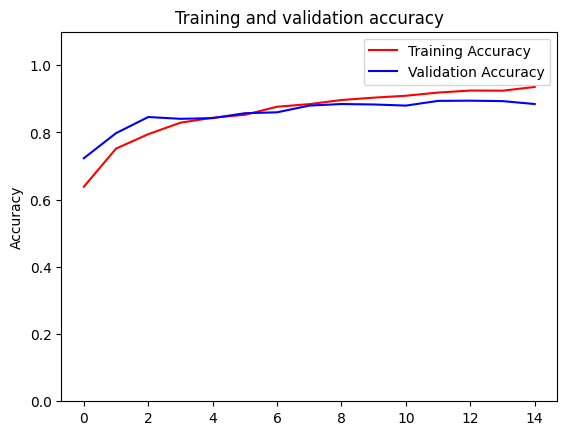

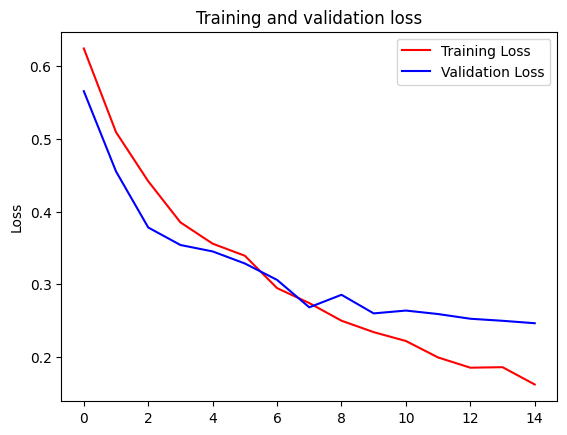

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))  # number of epochs

# accuracy
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1.1)  # Set y-axis limits slightly higher than 1.0 for better view of graph
plt.show()

# loss
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


# 5 random images from the dogs directory
dog_images = random.sample(os.listdir(TESTING_DOGS_DIR), 5)
for fn in dog_images:
    path = os.path.join(TESTING_DOGS_DIR, fn)
    x = load_image(path)
    classes = model.predict(x, batch_size=10)
    print("Dog image:", fn)
    if classes[0] > 0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

# 5 random images from the cats directory
cat_images = random.sample(os.listdir(TESTING_CATS_DIR), 5)
for fn in cat_images:
    path = os.path.join(TESTING_CATS_DIR, fn)
    x = load_image(path)
    classes = model.predict(x, batch_size=10)
    print("Cat:", fn)
    if classes[0] > 0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")


1/1 [==============================] - 0s 19ms/step
Dog image: 10849.jpg
10849.jpg is a dog
1/1 [==============================] - 0s 20ms/step
Dog image: 1368.jpg
1368.jpg is a dog
1/1 [==============================] - 0s 22ms/step
Dog image: 1239.jpg
1239.jpg is a dog
1/1 [==============================] - 0s 23ms/step
Dog image: 11353.jpg
11353.jpg is a dog
1/1 [==============================] - 0s 21ms/step
Dog image: 246.jpg
246.jpg is a dog
1/1 [==============================] - 0s 21ms/step
Cat: 8757.jpg
8757.jpg is a cat
1/1 [==============================] - 0s 22ms/step
Cat: 3706.jpg
3706.jpg is a cat
1/1 [==============================] - 0s 24ms/step
Cat: 6457.jpg
6457.jpg is a dog
1/1 [==============================] - 0s 19ms/step
Cat: 3874.jpg
3874.jpg is a dog
1/1 [==============================] - 0s 18ms/step
Cat: 974.jpg
974.jpg is a cat
